## Exploring the data

In [75]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# get data from csv

df = pd.read_csv('usarrests.csv', index_col=[0])
df

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.200,236,58,21.200
Alaska,10.000,263,48,44.500
Arizona,8.100,294,80,31.000
Arkansas,8.800,190,50,19.500
California,9.000,276,91,40.600
Colorado,7.900,204,78,38.700
Connecticut,3.300,110,77,11.100
Delaware,5.900,238,72,15.800
Florida,15.400,335,80,31.900


In [15]:
# get info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [16]:
# appears to be no null values

df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [17]:
# do statistical analysis of the data

stats = df.describe()
specific_stats = stats.loc[["mean", "std","min","max"]].transpose()
specific_stats

,mean,std,min,max
Murder,7.788,4.355510,0.8,17.4
Assault,170.760,83.337661,45.0,337.0
UrbanPop,65.540,14.474763,32.0,91.0
Rape,21.232,9.366385,7.3,46.0


From the above we can see assault has the largest standard deviation.  We also know that the Murder, Assault and Rape values are arrests per 100,000 people whereas Urban Population is a percentage.  So the data will need to be standardised.

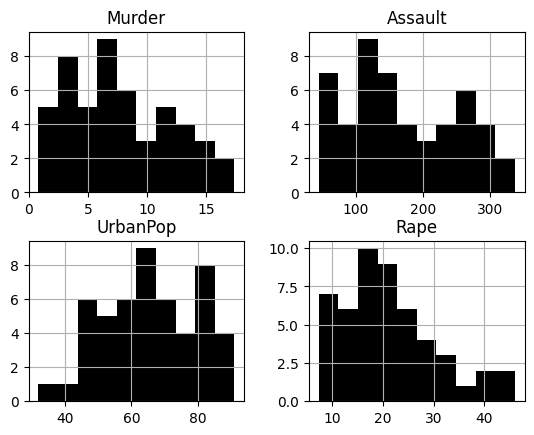

In [18]:
# Generate histogram for each column to see spread of data

histograms = df.hist(color='black')
plt.show()

## Correlation analysis

<AxesSubplot: >

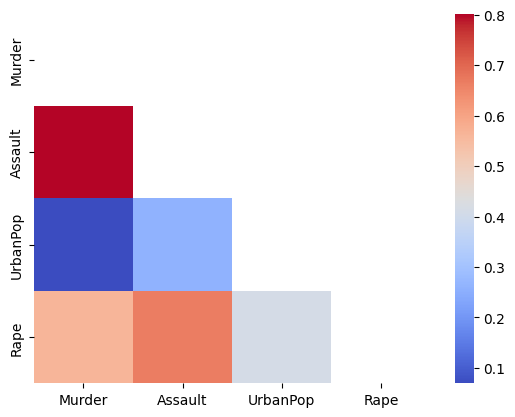

In [33]:
# Create correlation heatmap to get greater insight into data
import seaborn as sns

states = df.index

corr_df = df.corr()
labels = corr_df.columns
mask_data = np.triu(np.ones(corr_df.shape)).astype(bool)
sns.heatmap(corr_df, mask=mask_data, cmap="coolwarm")

In the heatmap we can see as expected to be a correlation between Assault, Murder and Rape.  As where there is more crime you expect to see more of each type of crime. 

## PCA Analysis

In [25]:
from sklearn.decomposition import PCA

#np.set_printoptions(precision=2)

X = df.values.squeeze()

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.802164,11.448007,-2.494933,2.407901
1,92.827450,17.982943,20.126575,-4.094047
2,124.068216,-8.830403,-1.687448,-4.353685
3,18.340035,16.703911,0.210189,-0.520994
4,107.422953,-22.520070,6.745873,-2.811826


In [29]:
std = df_pca.describe().transpose()["std"]

print(f"Standard deviation: {std.values}")

Standard deviation: [83.73 14.21  6.49  2.48]


In [31]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


In [32]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


Looking at the data it would appear PCA 1 is looking at Assaults as it has the largest variation in data.

In [36]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = states[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()


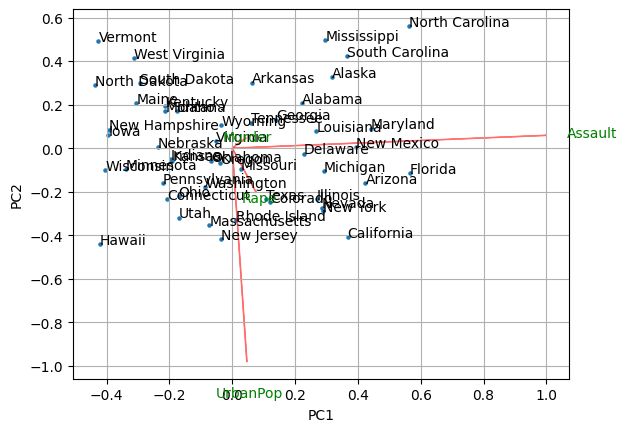

In [41]:
biplot(X_trans[:,0:3],np.transpose(pca.components_[0:3, :]),list(labels),list(states))
plt.show()

Here is a unstandardised graph of the projected data.  The importance of each feature is inidcated by the length of the red lines which is the size of the values in the eigenvectors.  We can see assault has the greatest importance followed by urban population.  However, urban population is a percentage and still needs to be standardised.

In [40]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )
pc3 = abs( pca.components_[2] )
pc4 = abs( pca.components_[3] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df["PC3 Importance"] = pc3
feat_df["PC4 Importance"] = pc4
feat_df

,Features,PC1 Importance,PC2 Importance,PC3 Importance,PC4 Importance
0,Murder,0.042,0.045,0.080,0.995
1,Assault,0.995,0.059,0.068,0.039
2,UrbanPop,0.046,0.977,0.201,0.058
3,Rape,0.075,0.201,0.974,0.072


We can see the importance given to each feature in the above table. Assault is given the most importance in PC1. Again urban population is given the most importance in PC2 which I believe may change once we standardise the data.

### Standardised data

Standardising the data so all values are weighted equally

In [42]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


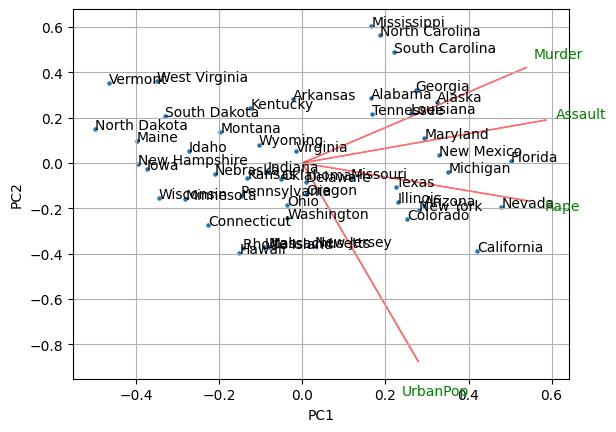

In [43]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

After standardising the data we can see all the features have larger variance and are not dominated by assault or urban population.

In [45]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )
pc3 = abs( std_pca.components_[2] )
pc4 = abs( std_pca.components_[3] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df["PC3 Importance"] = pc3
feat_df["PC4 Importance"] = pc4
feat_df

,Features,PC1 Importance,PC2 Importance,PC3 Importance,PC4 Importance
0,Murder,0.536,0.418,0.341,0.649
1,Assault,0.583,0.188,0.268,0.743
2,UrbanPop,0.278,0.873,0.378,0.134
3,Rape,0.543,0.167,0.818,0.089


In PC1 we can see now all features have similar importance apart from urban population

Text(0.5, 1.0, 'Cumulative Explained Variance')

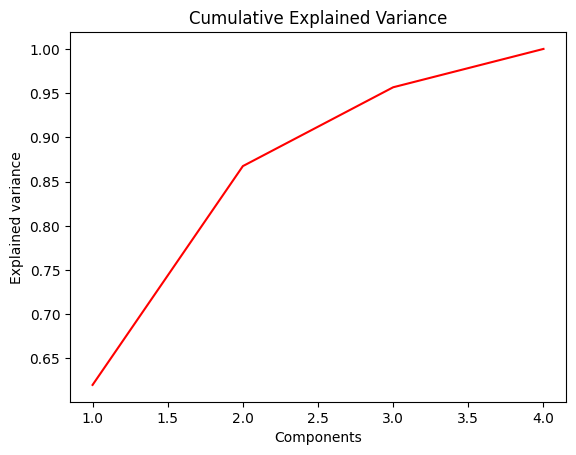

In [47]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

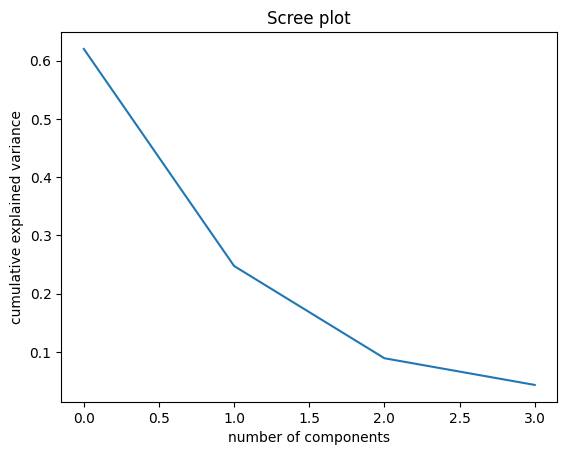

In [77]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The first 3 principal components explain over 95% of the variance, so we can use these components for cluster analysis.

In [52]:
pca_df = pd.DataFrame(X_std_trans[:,0:3], index = df.index)
pca_df.head()

,0,1,2
City,,,
Alabama,0.986,1.133,-0.444
Alaska,1.950,1.073,2.040
Arizona,1.763,-0.746,0.055
Arkansas,-0.141,1.120,0.115
California,2.524,-1.543,0.599


### Hierarchical Clustering

Using Hierarchical Clustering with different methods to ascertain the best grouping

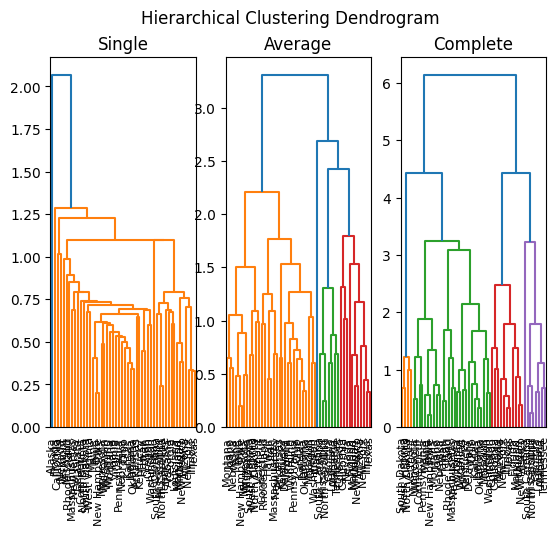

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

Looking at the results above, average clustering seems to be produce the most balanced results

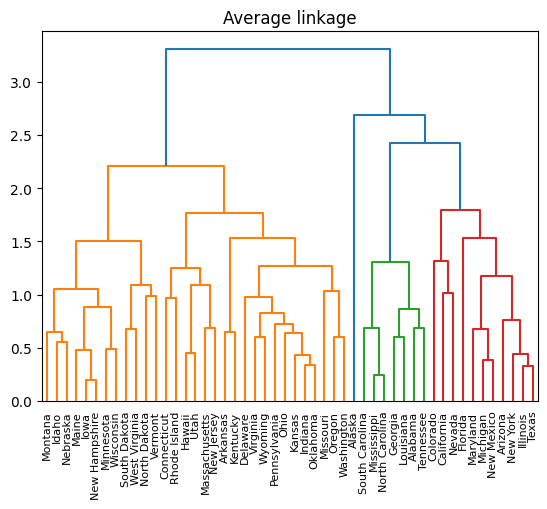

In [55]:
plt.title("Average linkage")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index)
plt.show()

Looking at the data, it appears the clustering appears to be strongly focused on the rape data.  The states in orange indicate low levels of rape, the green middle levels and the red are states with high levels of rape.  As expected the states with the highest levels also have the highest urban population.  Alaska appears to be an outlier due to the high level of rape but low urban population.

### K-means clustering

Text(0, 0.5, 'Dim 1')

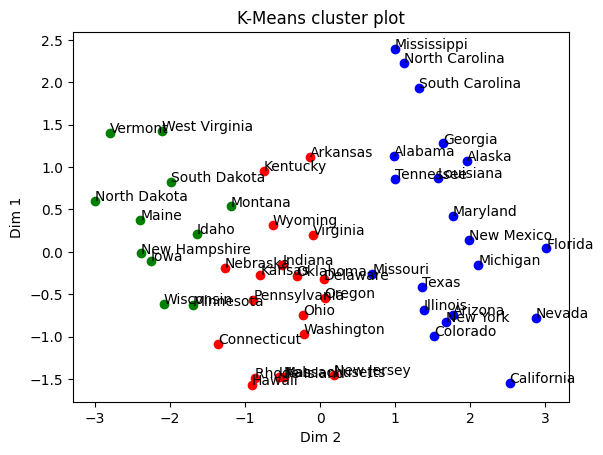

In [73]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = states[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")

In [74]:
# Groups - translate to readable names
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group2_indices = np.argwhere(cluster_labels==2).transpose()[0]

group0 = np.array(states)[group0_indices]
group1 = np.array(states)[group1_indices]
group2 = np.array(states)[group2_indices]


print(f"Group 0: {group0}\n\n")
print(f"Group 1: {group1}\n\n")
print(f"Group 2: {group2}\n\n")


Group 0: ['Arkansas' 'Connecticut' 'Delaware' 'Hawaii' 'Indiana' 'Kansas'
 'Kentucky' 'Massachusetts' 'Nebraska' 'New Jersey' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'Utah' 'Virginia' 'Washington'
 'Wyoming']


Group 1: ['Alabama' 'Alaska' 'Arizona' 'California' 'Colorado' 'Florida' 'Georgia'
 'Illinois' 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Missouri'
 'Nevada' 'New Mexico' 'New York' 'North Carolina' 'South Carolina'
 'Tennessee' 'Texas']


Group 2: ['Idaho' 'Iowa' 'Maine' 'Minnesota' 'Montana' 'New Hampshire'
 'North Dakota' 'South Dakota' 'Vermont' 'West Virginia' 'Wisconsin']




For K-means clustering it appears the data is grouped primarily on murders.  Where the green cluster is a low level of murder, the red cluster is a medium level and the blue cluster is a high level.  As we saw from the heatmap there is a positive correlation between assualt, murder and rape.  So you would expect those values to correlate to the number of murders as well.